In [2]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
current_dir = os.path.abspath(os.getcwd())


%load_ext sql
%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False
conn_string = f"sqlite:////{current_dir}/db.sqlite3"
%sql $conn_string

db_person table records counts (10k downloaded persons)

In [3]:
%sql select count(*) from db_person;


[(10001,)]

PLAIN ANSWERS FROM THE ASSIGNMENT
1. Which percentage of users live in Germany and use Gmail as an email provider?

In [19]:
cmd = '''
select
printf("%.2f", count(*) * 1.0 / (select count(*) from db_person) * 100) || "%" as germans_using_gmail
from db_person
where country = 'Germany' and email_provider = '@gmail.com'
'''
%sql $cmd

[('0.05%',)]

2. Which are the top countries in our database that use Gmail as an email provider?

In [45]:
cmd = '''
select * from (
    with cte as (
        select
            country,
            count(*) total_email_users
        from db_person
        where email_provider = '@gmail.com'
        group by country
        order by total_email_users desc
    )
    select
        row_number() over (order by total_email_users desc) as email_rank,
        cte.*
    from cte
) a where email_rank <= 3;
'''
%sql $cmd

[(1, 'Moldova', 14), (2, 'Grenada', 14), (3, 'Greenland', 14)]

3. How many people over 60 years use Gmail as an email provider?

In [6]:
cmd = '''
select count(*) from db_person where email_provider = '@gmail.com' and age_range_lower >= 60;
'''
%sql $cmd

[(553,)]

---------------
Futher analisys

Top 10 countries with more people

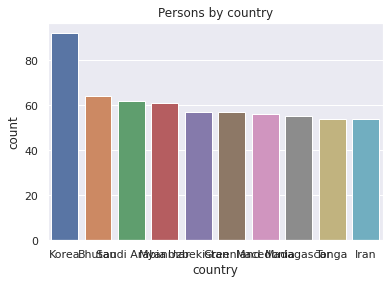

In [7]:
cmd = '''
select country, count(*) count
from db_person group by country order by 2 desc limit 10
'''
count = %sql $cmd

count_df = count.DataFrame()
sns.set(rc = {'figure.figsize':(12,5)})
ax = sns.barplot(x='country', y='count', data=count_df)
ax.set_title("Persons by country");


gender distribution

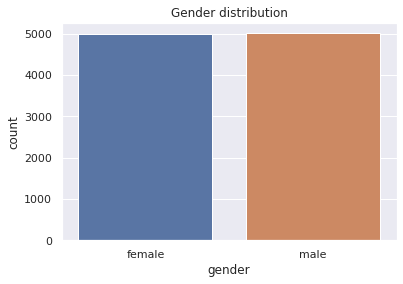

In [8]:
cmd = '''
select gender, count(*) count
from db_person group by gender
'''
count = %sql $cmd

count_df = count.DataFrame()
ax = sns.barplot(x='gender', y='count', data=count_df)
ax.set_title("Gender distribution");

top 5 email providers

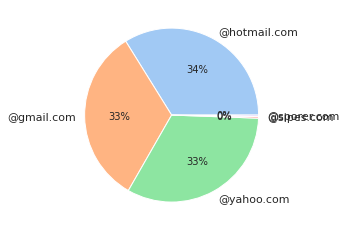

In [9]:
cmd = '''
select email_provider, count(*) count
from db_person group by email_provider order by 2 desc limit 5
'''
count = %sql $cmd

count_df = count.DataFrame()
data = count_df["count"].tolist()
labels = count_df["email_provider"].tolist()

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
# ax = sns.barplot(x='email_provider', y='count', data=count_df)
# ax.set_title("Top 10 email providers");

age distribution

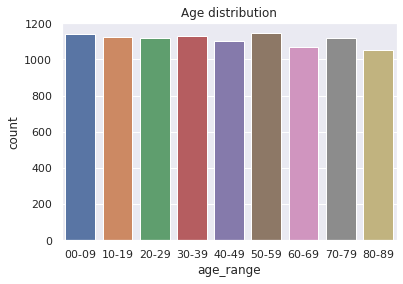

In [10]:
cmd = '''
select age_range, age_range_lower, count(*) count
from db_person group by age_range order by age_range_lower
'''
count = %sql $cmd

count_df = count.DataFrame()
ax = sns.barplot(x='age_range', y='count', data=count_df)
ax.set_title("Age distribution");

Users in Germany and email providers statistics

In [40]:
cmd = '''
with cte as (
    select
        country, id, age_range, gender,
        email_provider,
        count(*) over (partition by email_provider) as total_email_users,
        printf("%.2f", count(*) over (partition by email_provider) * 1.0 / count(*) over () * 100) || "%"  as email_provider_market_share
    from db_person
    where country = 'Germany'
    order by total_email_users desc
)
select
    dense_rank() over (order by total_email_users desc) as email_rank,
    cte.*
from cte;
'''
%sql $cmd

[(1, 'Germany', 1651, '20-29', 'female', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 2479, '30-39', 'male', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 3061, '50-59', 'female', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 3732, '60-69', 'female', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 5812, '00-09', 'female', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 7901, '40-49', 'male', '@yahoo.com', 7, '14.58%'),
 (1, 'Germany', 8634, '60-69', 'female', '@yahoo.com', 7, '14.58%'),
 (2, 'Germany', 428, '30-39', 'female', '@hotmail.com', 6, '12.50%'),
 (2, 'Germany', 1797, '50-59', 'male', '@hotmail.com', 6, '12.50%'),
 (2, 'Germany', 5295, '00-09', 'female', '@hotmail.com', 6, '12.50%'),
 (2, 'Germany', 6228, '40-49', 'female', '@hotmail.com', 6, '12.50%'),
 (2, 'Germany', 8760, '00-09', 'male', '@hotmail.com', 6, '12.50%'),
 (2, 'Germany', 9339, '30-39', 'female', '@hotmail.com', 6, '12.50%'),
 (3, 'Germany', 3536, '20-29', 'male', '@gmail.com', 5, '10.42%'),
 (3, 'Germany', 5601, '30-39', 'male', '@gmail.com', 5, '10.42%'),
 (3, 'Germany', 5885, '00-09', 'male', '@gmail.com', 5, '10.42%'),
 (3, 'Germany', 6178, '60-69', 'female', '@gmail.com', 5, '10.42%'),
 (3, 'Germany', 6506, '00-09', 'female', '@gmail.com', 5, '10.42%'),
 (4, 'Germany', 3997, '50-59', 'male', '@gleichner.com', 2, '4.17%'),
 (4, 'Germany', 7323, '20-29', 'female', '@gleichner.com', 2, '4.17%'),
 (5, 'Germany', 403, '70-79', 'male', '@auer.com', 1, '2.08%'),
 (5, 'Germany', 5720, '30-39', 'male', '@bahringer.com', 1, '2.08%'),
 (5, 'Germany', 3255, '00-09', 'male', '@conn.com', 1, '2.08%'),
 (5, 'Germany', 4711, '70-79', 'male', '@cremin.com', 1, '2.08%'),
 (5, 'Germany', 7043, '10-19', 'male', '@daniel.com', 1, '2.08%'),
 (5, 'Germany', 6481, '10-19', 'female', '@donnelly.org', 1, '2.08%'),
 (5, 'Germany', 607, '00-09', 'female', '@dooley.com', 1, '2.08%'),
 (5, 'Germany', 8307, '00-09', 'female', '@douglas.com', 1, '2.08%'),
 (5, 'Germany', 4791, '70-79', 'female', '@doyle.net', 1, '2.08%'),
 (5, 'Germany', 1380, '50-59', 'male', '@eichmann.com', 1, '2.08%'),
 (5, 'Germany', 4741, '70-79', 'male', '@fritsch.com', 1, '2.08%'),
 (5, 'Germany', 3217, '20-29', 'male', '@green.com', 1, '2.08%'),
 (5, 'Germany', 1026, '10-19', 'male', '@hirthe.com', 1, '2.08%'),
 (5, 'Germany', 2076, '00-09', 'male', '@king.info', 1, '2.08%'),
 (5, 'Germany', 6895, '60-69', 'female', '@mcdermott.org', 1, '2.08%'),
 (5, 'Germany', 7042, '50-59', 'female', '@mcglynn.com', 1, '2.08%'),
 (5, 'Germany', 9704, '70-79', 'female', '@medhurst.com', 1, '2.08%'),
 (5, 'Germany', 8278, '70-79', 'female', '@mraz.info', 1, '2.08%'),
 (5, 'Germany', 2197, '30-39', 'male', '@pfeffer.net', 1, '2.08%'),
 (5, 'Germany', 6888, '40-49', 'male', '@prosacco.com', 1, '2.08%'),
 (5, 'Germany', 6636, '00-09', 'male', '@rippin.org', 1, '2.08%'),
 (5, 'Germany', 264, '00-09', 'female', '@rosenbaum.org', 1, '2.08%'),
 (5, 'Germany', 7020, '20-29', 'female', '@runolfsson.biz', 1, '2.08%'),
 (5, 'Germany', 6714, '50-59', 'female', '@sanford.com', 1, '2.08%'),
 (5, 'Germany', 191, '50-59', 'female', '@steuber.org', 1, '2.08%'),
 (5, 'Germany', 7544, '30-39', 'male', '@stiedemann.com', 1, '2.08%'),
 (5, 'Germany', 1983, '30-39', 'male', '@swift.biz', 1, '2.08%'),
 (5, 'Germany', 9257, '10-19', 'male', '@toy.com', 1, '2.08%')]